<a href="https://colab.research.google.com/github/Kumarraja25/DL/blob/main/CNN_12_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

## load the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


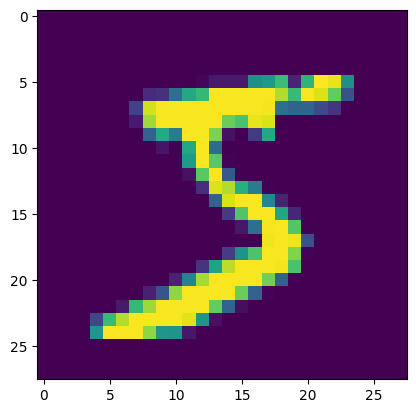

In [5]:
print(y_train[0])
plt.imshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

## Create CNN Model


In [10]:
cnn=Sequential()
cnn.add(Conv2D(30,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))
cnn.add(Conv2D(10,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))
cnn.add(Conv2D(5,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(10,activation='softmax'))


cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 10)        2710      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 5)         455       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 19, 19, 5)        

## Compile the model

In [15]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Train the model

In [18]:
cnn.fit(x_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0381 - accuracy: 0.9874
Epoch 2/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 3/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 4/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 5/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0112 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0117 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] 

## Evaluate the model

In [19]:
score=cnn.evaluate(x_test,y_test)
print('loss =',score[0])
print('accuracy',score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0452 - accuracy: 0.9895
loss = 0.045231256633996964
accuracy 0.9894999861717224


## Predict the classes

In [22]:
pred_classes=cnn.predict(x_test)
print(pred_classes)
pred_classes.shape

313/313 [==============================] - 6s 20ms/step
[[1.1589342e-19 6.7230140e-15 4.2914447e-14 ... 9.9999994e-01
  2.0143963e-18 6.7960833e-13]
 [4.8316832e-12 6.6001790e-14 9.9999994e-01 ... 2.7120837e-18
  1.3340893e-17 4.7183586e-21]
 [1.5163130e-16 9.9999958e-01 2.1112855e-11 ... 2.0870338e-08
  3.3200050e-07 3.0422345e-11]
 ...
 [2.6083140e-26 3.7777287e-14 3.6960056e-19 ... 1.4661731e-12
  6.5609380e-12 7.8324115e-13]
 [1.7420217e-12 1.6382734e-16 4.0641419e-20 ... 4.0720294e-18
  8.7813887e-06 7.2886846e-15]
 [3.6117370e-12 4.5251422e-19 1.5130438e-15 ... 9.7092038e-24
  1.4667008e-13 2.1504208e-14]]


(10000, 10)

In [25]:
import numpy as np
y_predicted_labels=[np.argmax(i) for i in pred_classes]
y_predicted_labels[:10]


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

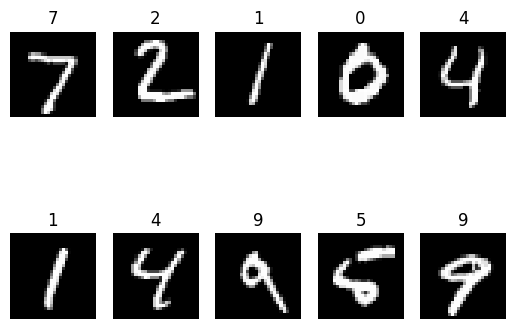

In [28]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i],cmap='gray')
  plt.title(y_test[i])
  plt.axis('off')
plt.show()

1/1 [==============================] - 0s 110ms/step
3


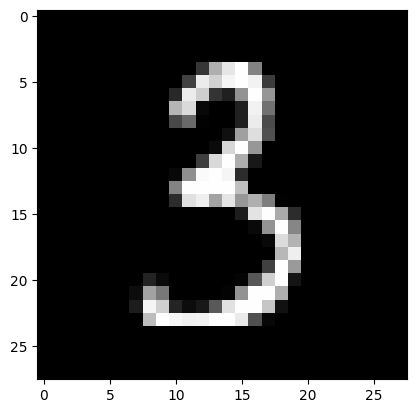

In [29]:
image_index=76
plt.imshow(x_test[image_index].reshape(28,28),cmap='gray')
pred=cnn.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Truth')

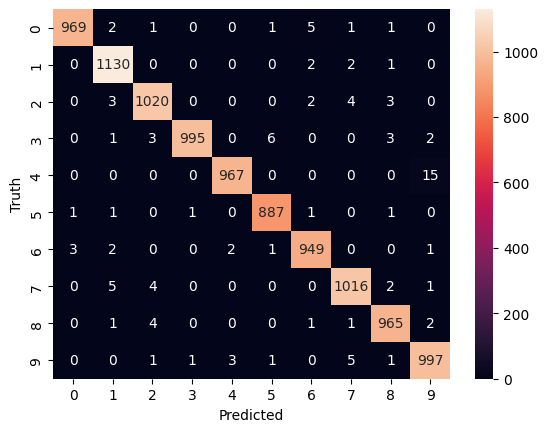

In [32]:
cm=tf.math.confusion_matrix(y_test,y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')